<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas y Jose Alberto Mayagoitia Gutierrez.

**Fecha:** 20 de octubre del 2021.

**Expediente** : 714383 y 720266.
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/SPF_Tarea7_IArellano_JMayagoitia

# Tarea 7: Clase 13

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
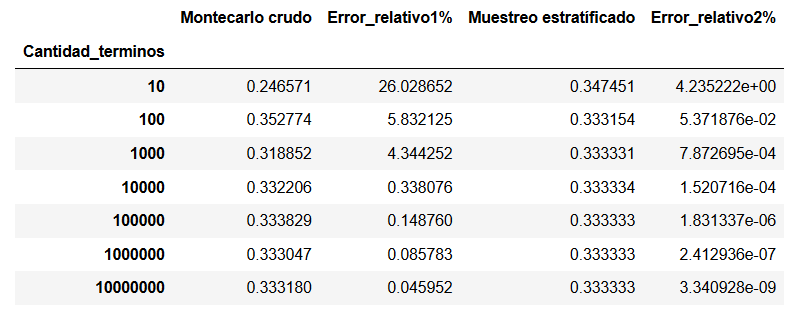


# Código Iván

In [ ]:
# Código Iván 

# Código Jose

In [1]:
# Código Jose
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [12]:
# Código de solución 
def Estratos(N):
    U2 = np.random.rand(N)
    i = np.arange(0,N)
    v = (U2+i)/N  
    return v
N3=1000
Estratos(N3)

array([2.40260130e-04, 1.68093407e-03, 2.91524894e-03, 3.25388269e-03,
       4.28692421e-03, 5.49952156e-03, 6.92030118e-03, 7.27486113e-03,
       8.13100257e-03, 9.35089455e-03, 1.06274528e-02, 1.11551964e-02,
       1.24682505e-02, 1.38998088e-02, 1.49714802e-02, 1.54459490e-02,
       1.68763364e-02, 1.73607842e-02, 1.81939753e-02, 1.90001266e-02,
       2.08289853e-02, 2.13324334e-02, 2.24869981e-02, 2.31395226e-02,
       2.43398656e-02, 2.50785093e-02, 2.63560712e-02, 2.79337099e-02,
       2.82696398e-02, 2.96697336e-02, 3.05055170e-02, 3.10413320e-02,
       3.27738500e-02, 3.32625052e-02, 3.41991310e-02, 3.50955788e-02,
       3.69866690e-02, 3.78751072e-02, 3.87754995e-02, 3.93553872e-02,
       4.03900977e-02, 4.18682468e-02, 4.25994396e-02, 4.36865285e-02,
       4.47067289e-02, 4.53080267e-02, 4.67341134e-02, 4.76029770e-02,
       4.83719697e-02, 4.94252464e-02, 5.02382282e-02, 5.10919721e-02,
       5.28115248e-02, 5.32133641e-02, 5.49672044e-02, 5.51263370e-02,
      

In [13]:
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [14]:
# Montecarlo crudo

I = 1/3
# intervalo de integración
a = 0; b = 1

#Función
f=lambda x: x**2

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Valor_aproximacion"] = I_m
df.loc[N,"Error_relativo%"] = np.abs(df.loc[N,"Valor_aproximacion"]-I)*100/I
df

,Valor_aproximacion,Error_relativo%
Cantidad_terminos,,
10,0.210386,36.884233
100,0.328442,1.467400
1000,0.350282,5.084735
10000,0.333335,0.000441
100000,0.334537,0.360963
1000000,0.333877,0.163082
10000000,0.333303,0.009131


In [15]:
# Muestreo estratificado
u1=list(map(lambda N: Estratos(N),N))
I_m2 = list(map(lambda Y:int_montecarlo(f,a,b,Y),u1))

I_m2

[0.3376215108576583,
 0.3331958096655053,
 0.33333354604719284,
 0.3333336163551035,
 0.3333333346069792,
 0.3333333327893502,
 0.3333333333485007]

In [16]:
comparacion = pd.DataFrame(index= N,columns=['Montecarlo crudo','Error_relativo1%','Muestreo estratificado','Error_relativo2%'], dtype='float')
comparacion.index.name = "Cantidad_terminos"
comparacion['Montecarlo crudo']=I_m
comparacion['Error_relativo1%']=np.abs(comparacion.loc[N,"Montecarlo crudo"]-I)*100/I
comparacion['Muestreo estratificado']=I_m2
comparacion['Error_relativo2%']=np.abs(comparacion.loc[N,"Muestreo estratificado"]-I)*100/I

comparacion

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.210386,36.884233,0.337622,1.286453e+00
100,0.328442,1.467400,0.333196,4.125710e-02
1000,0.350282,5.084735,0.333334,6.381416e-05
10000,0.333335,0.000441,0.333334,8.490653e-05
100000,0.334537,0.360963,0.333333,3.820938e-07
1000000,0.333877,0.163082,0.333333,1.631949e-07
10000000,0.333303,0.009131,0.333333,4.550210e-09
